In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

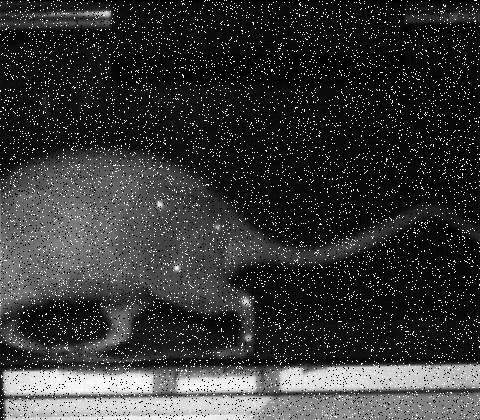

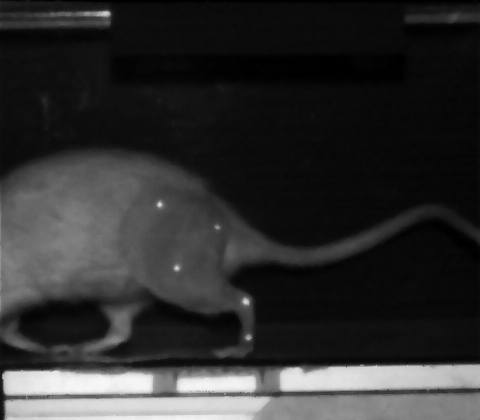

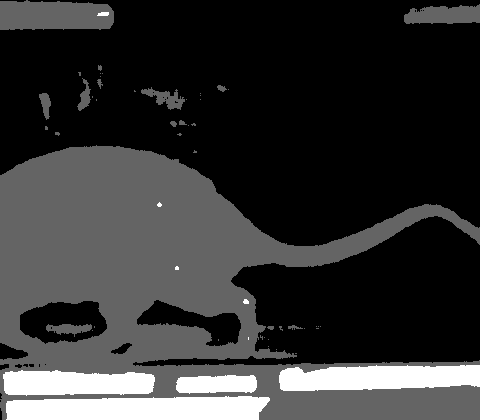

(420, 480)


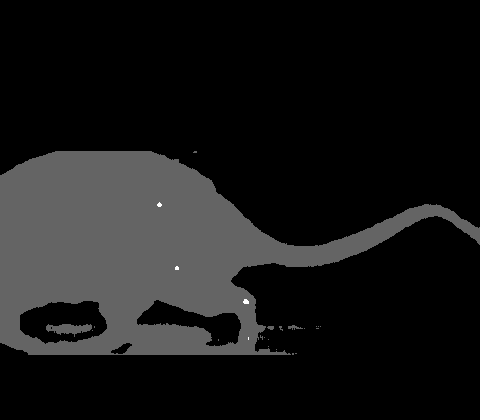

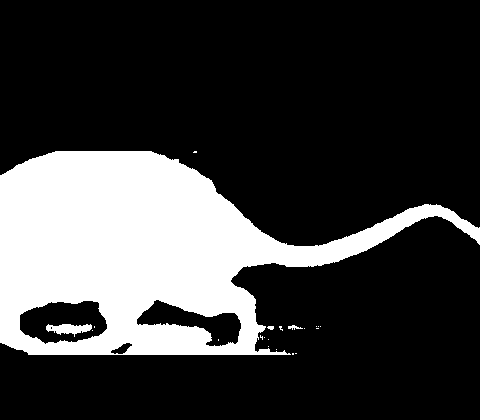

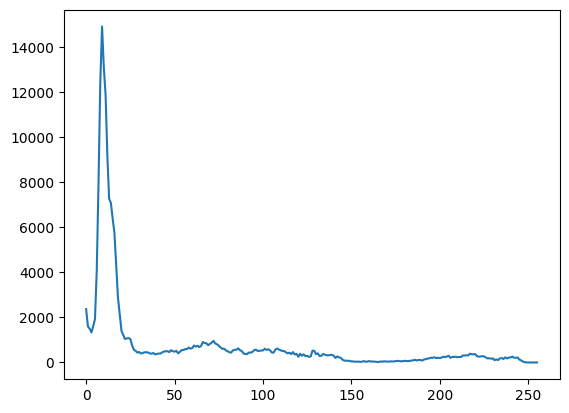

In [78]:
path = "/content/drive/MyDrive/2023_24_PDI_EN_AC_TP01/TP01_a.bmp"

rat = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

cv2_imshow(rat)

rat_filtered = cv2.medianBlur(rat, 5)

cv2_imshow(rat_filtered)

rat_hist = cv2.calcHist([rat_filtered], [0], None, [256], [0, 256])

plt.plot(rat_hist)

low_thresh = 20
high_thresh = 160

rat_thresh = rat_filtered
lines = rat_filtered.shape[0]
columns = rat_filtered.shape[1]

for line in range(lines):
  for column in range(columns):
    if rat_filtered[line, column] < low_thresh:
      rat_thresh[line, column] = 0
    elif rat_filtered[line, column] < high_thresh and rat_filtered[line, column] >= low_thresh:
      rat_thresh[line, column] = 100
    else:
      rat_thresh[line, column] = 255

cv2_imshow(rat_thresh)

print(rat_thresh.shape)

lines = rat_thresh.shape[0]
columns = rat_thresh.shape[1]

for line in range(lines):
  for column in range(columns):
    if not(150 < line < 355):
      rat_thresh[line, column] = 0

cv2_imshow(rat_thresh)

rat_binary = rat_thresh
lines = rat_thresh.shape[0]
columns = rat_thresh.shape[1]

for line in range(lines):
  for column in range(columns):
    if rat_thresh[line, column] < 99:
      rat_binary[line, column] = 0
    else:
      rat_binary[line, column] = 255

cv2_imshow(rat_binary)



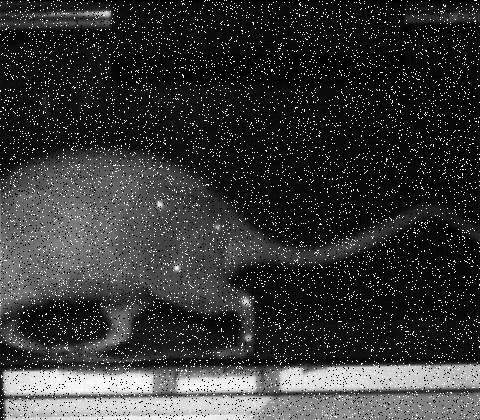

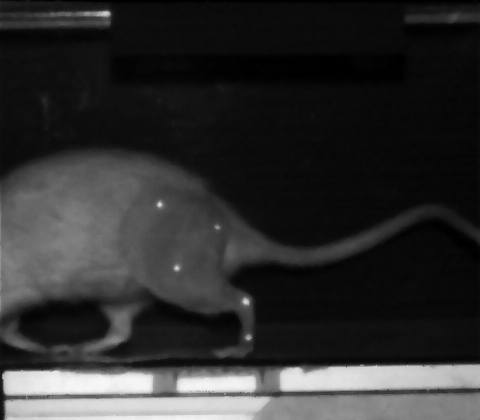

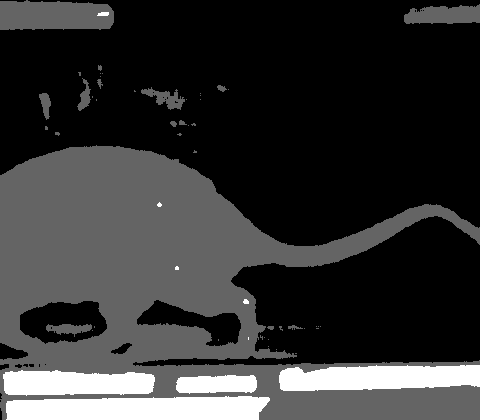

(420, 480)


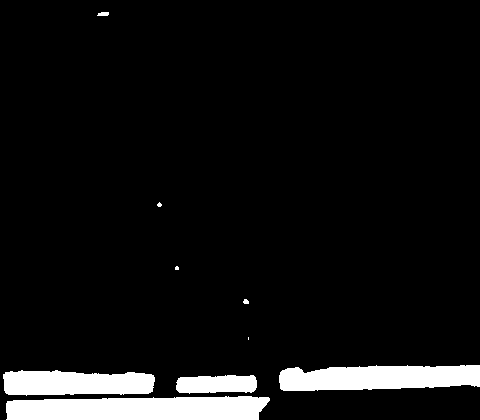

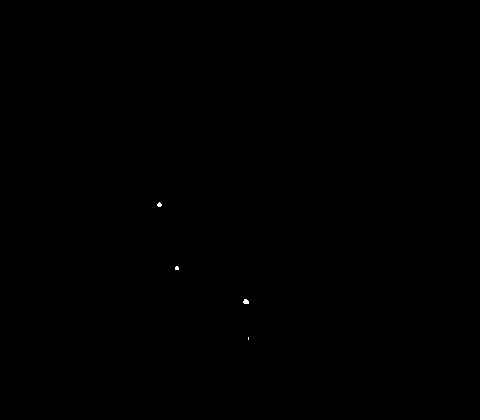

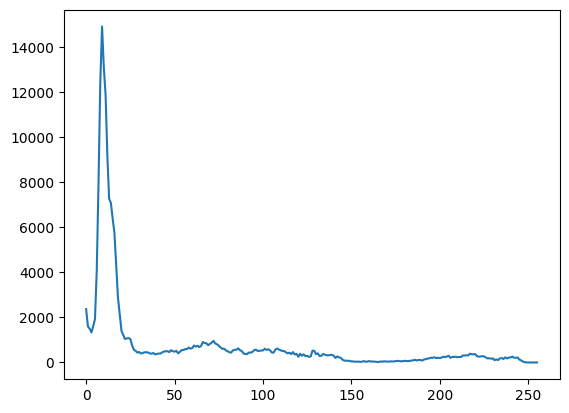

In [91]:
path = "/content/drive/MyDrive/2023_24_PDI_EN_AC_TP01/TP01_a.bmp"

rat = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

cv2_imshow(rat)

rat_filtered = cv2.medianBlur(rat, 5)

cv2_imshow(rat_filtered)

rat_hist = cv2.calcHist([rat_filtered], [0], None, [256], [0, 256])

plt.plot(rat_hist)

low_thresh = 20
high_thresh = 160

rat_thresh = rat_filtered
lines = rat_filtered.shape[0]
columns = rat_filtered.shape[1]

for line in range(lines):
  for column in range(columns):
    if rat_filtered[line, column] < low_thresh:
      rat_thresh[line, column] = 0
    elif rat_filtered[line, column] < high_thresh and rat_filtered[line, column] >= low_thresh:
      rat_thresh[line, column] = 100
    else:
      rat_thresh[line, column] = 255

cv2_imshow(rat_thresh)

print(rat_thresh.shape)

rat_points = rat_thresh
lines = rat_thresh.shape[0]
columns = rat_thresh.shape[1]

for line in range(lines):
  for column in range(columns):
    if rat_thresh[line, column] < 155:
      rat_points[line, column] = 0
    else:
      rat_points[line, column] = 255

cv2_imshow(rat_points)

rat_cropped = rat_points
lines = rat_points.shape[0]
columns = rat_points.shape[1]

for line in range(lines):
  for column in range(columns):
    if not(100 < line < 350):
      rat_points[line, column] = 0
    else:
      continue

cv2_imshow(rat_cropped)

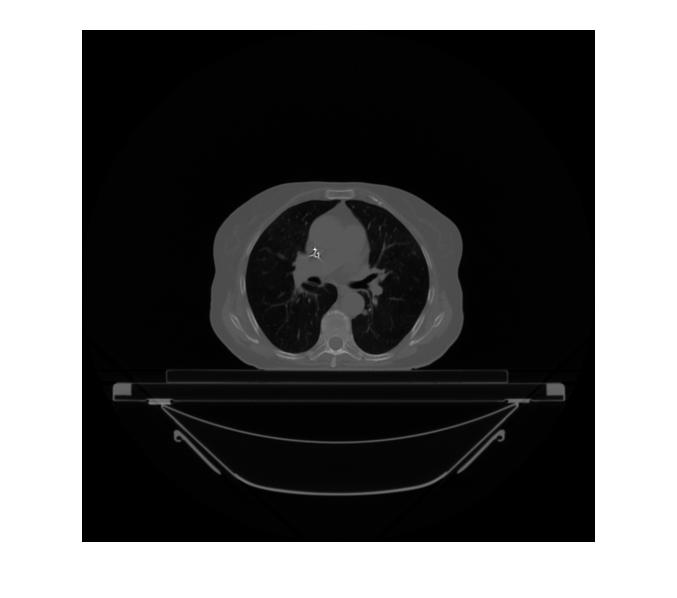

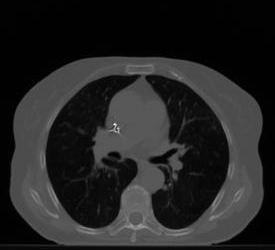

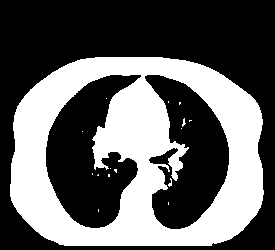

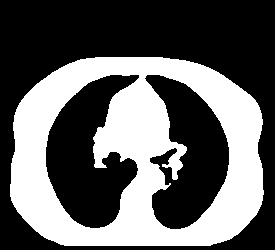

(250, 275)


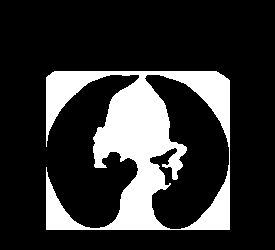

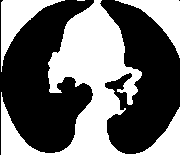

In [94]:
path1 = "/content/drive/MyDrive/2023_24_PDI_EN_AC_TP01/TP01_b.jpg"

lung = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)

cv2_imshow(lung)

lines = lung.shape[0]
columns = lung.shape[1]

x = 200
y = 125

cropped_lung = lung[y:y+250, x:x+275]

cv2_imshow(cropped_lung)


lung_otsu = cv2.threshold(cropped_lung, 0, 255, cv2.THRESH_OTSU)[1]

cv2_imshow(lung_otsu)

lung_blur = cv2.medianBlur(lung_otsu, 5)

cv2_imshow(lung_blur)
print(lung_blur.shape)

lung_final = lung_blur
lines = lung_blur.shape[0]
columns = lung_blur.shape[1]

for line in range(lines):
  for column in range(columns):
    if not(70 < line < 230) or not(45 < column < 230):
      lung_final[line, column] = 0
    else:
      continue

cv2_imshow(lung_final)

x= 0
y = 0
cropped_lung2 = lung_final[75:y+230, 45:x + 225]

cv2_imshow(cropped_lung2)